# Implementing Agglomerative Hierarchical Clustering
Agglomerative hierarchical clustering differs from k-means in a key way. Rather than choosing a number of clusters and starting out with random centroids, we instead begin with every point in our dataset as a “cluster.” Then we find the two closest points and combine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until we only have one big giant cluster.
Along the way, we create what’s called a dendrogram. This is our “history.” You can see the dendrogram for our data points

In [1]:
#importing libraries for number manipulation dataframe operation and graphs

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Here we have used sklearn samples generator to create a 2d dataset with 500 members and 3 clusters. This dataset will be arragned in such a way that 500 point will form three clusters which we will try to detect using Hierarchical algorithm and in last line using matplotlib we have drawn graph for those points

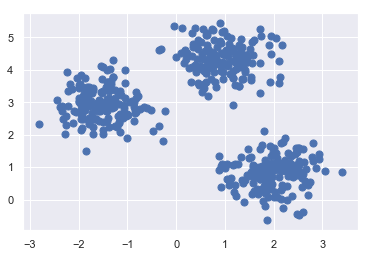

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=500, centers=3,cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

We have drawn a dendrogram in which x-axis consists of the features that is x from randomly generated dataset and y-axis consists of the Euclidean distance between the clusters. How do we determine the optimal number of clusters from this diagram? We look for the largest distance that we can vertically without crossing any horizontal line and this one is the first blue line on the below diagram. Let's count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

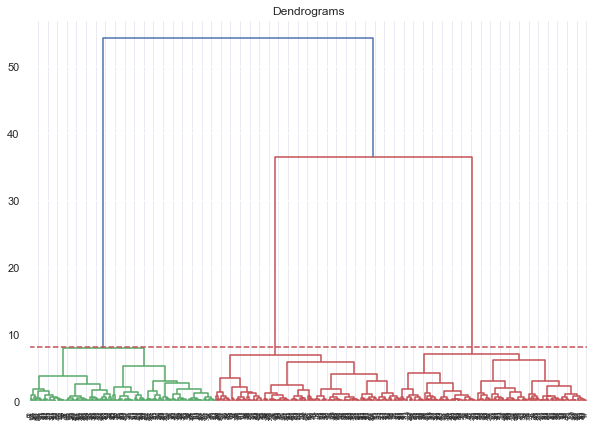

In [4]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=8, color='r', linestyle='--')

Here we have imported AgglomerativeClustering and created its object and fit that to X to have prediction

In [5]:
from sklearn.cluster import AgglomerativeClustering
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)

Plotting the results and see the clusters which are formed using hierarchical clustering 

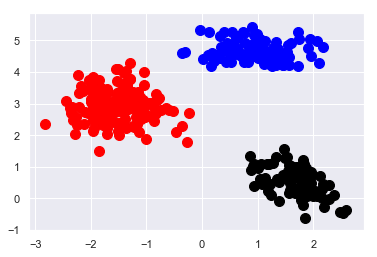

In [6]:
plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=100, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=100, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=100, c='blue')

Importing dataset using pandas

In [7]:
dataset = pd.read_csv('clustering.csv' , encoding='cp437')

Having a look at the dataset using head() function it will show first 5 rows in dataset

In [8]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We want to cluster costumers based on annual income and the amount they spend which is denoted by spending score which is between 1 and 100 That is why we have selected x from 3th to 5th column (5th exclusive [3,5))

In [9]:
x=dataset.iloc[:,3:5].values

Lets visualise the data using scatter plot

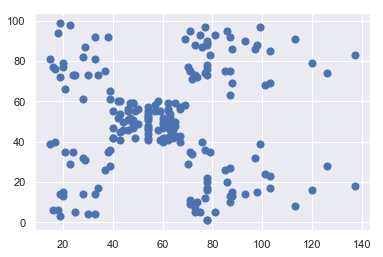

In [10]:
plt.scatter(x[:, 0], x[:, 1], s=50);

We have drawn a dendrogram in which x-axis consists costumers from dataset and y-axis consists of the Euclidean distance between the clusters. How do we determine the optimal number of clusters from this diagram? We look for the largest distance that we can vertically without crossing any horizontal line and this one is the last blue line on the below diagram. Let's count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 5 for this dataset.

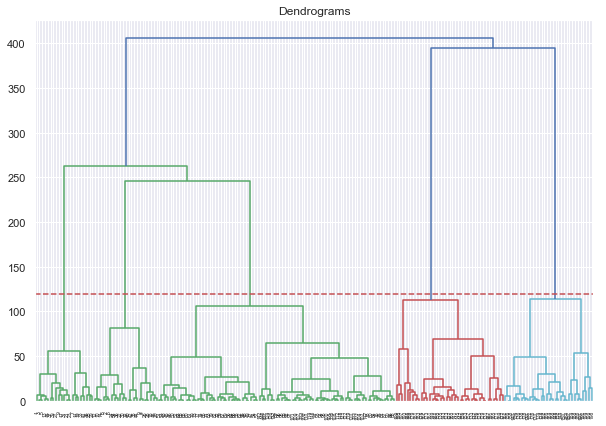

In [11]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))
plt.axhline(y=120, color='r', linestyle='--')

Here we have imported AgglomerativeClustering and created its object and fit that to x to have prediction

In [12]:
from sklearn.cluster import AgglomerativeClustering
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(x)

Plotting the results and see the clusters which are formed using hierarchical clustering

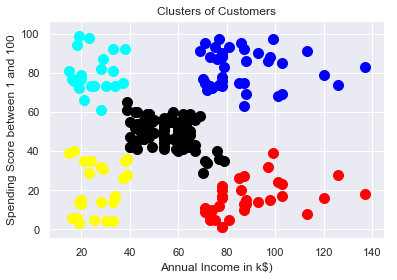

In [13]:
plt.scatter(x[y_hc ==0,0], x[y_hc == 0,1], s=100, c='red')
plt.scatter(x[y_hc==1,0], x[y_hc == 1,1], s=100, c='black')
plt.scatter(x[y_hc ==2,0], x[y_hc == 2,1], s=100, c='blue')
plt.scatter(x[y_hc ==3,0], x[y_hc == 3,1], s=100, c='cyan')
plt.scatter(x[y_hc ==4,0], x[y_hc == 4,1], s=100, c='yellow')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income in k$)')
plt.ylabel('Spending Score between 1 and 100')
plt.show()

# The interpretation of the graph is clear there are 5 segments of costumers

1 yellow, costumers in this cluster earns less spends less

2 cyan, costumers in this cluster earn less but spend more

3 blue, costumers in this cluster are ideal target costumer as they earn more and spend more

4 black, costumers in this cluster they are moderate they earn average spend avergae

5 red, costumers in this cluster earn more and spend less